In [20]:
# general 
import psycopg2 as psyc
import pandas as pd
import numpy as np
import json
import datetime
from collections import Counter

# statistics 
from statsmodels.stats.weightstats import ttest_ind
from scipy.stats import ttest_rel, bartlett, levene

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
# saved database connection data as a hidden json file, for confidentiality 
with open("/Users/lucasramadan/SCL-Work/.db_conn.json", 'r') as f:
    db_conn = json.load(f)

In [22]:
# create the connection
# unpacking the arguments
conn = psyc.connect(**db_conn)

In [23]:
cur = conn.cursor()

In [24]:
# query to gather metrics 
with open('/Users/lucasramadan/SCL-Work/cancellation_rates_by_hour.sql') as f:
    q = f.read()

In [25]:
cur.execute(q)

In [26]:
data = cur.fetchall()
data

[(0, 5.72499746681528),
 (1, 4.47867058465903),
 (2, 3.86057351302057),
 (3, 3.43499848008917),
 (4, 2.19880433681224),
 (5, 1.35778700982876),
 (6, 0.952477454655994),
 (7, 0.476238727327997),
 (8, 0.283716688620934),
 (9, 0.11146012767251),
 (10, 0.293849427500253),
 (11, 0.354645860776168),
 (12, 0.759955415948931),
 (13, 3.70858242983078),
 (14, 7.31583747086838),
 (15, 5.5223426892289),
 (16, 6.62681122707468),
 (17, 7.64008511500659),
 (18, 8.19738575336913),
 (19, 7.44756307629952),
 (20, 7.78194345931705),
 (21, 7.90353632586888),
 (22, 7.41716485966157),
 (23, 6.12017428310872),
 (None, 0.0303982166379572)]

In [27]:
data = np.asarray(data)
data

array([[0, 5.72499746681528],
       [1, 4.47867058465903],
       [2, 3.86057351302057],
       [3, 3.43499848008917],
       [4, 2.19880433681224],
       [5, 1.35778700982876],
       [6, 0.952477454655994],
       [7, 0.476238727327997],
       [8, 0.283716688620934],
       [9, 0.11146012767251],
       [10, 0.293849427500253],
       [11, 0.354645860776168],
       [12, 0.759955415948931],
       [13, 3.70858242983078],
       [14, 7.31583747086838],
       [15, 5.5223426892289],
       [16, 6.62681122707468],
       [17, 7.64008511500659],
       [18, 8.19738575336913],
       [19, 7.44756307629952],
       [20, 7.78194345931705],
       [21, 7.90353632586888],
       [22, 7.41716485966157],
       [23, 6.12017428310872],
       [None, 0.0303982166379572]], dtype=object)

In [28]:
df = pd.DataFrame(data[:, 1], columns=['cancellation rate'], index=data[:, 0])
df.head()

,cancellation rate
0,5.725
1,4.47867
2,3.86057
3,3.435
4,2.1988


In [31]:
df.tail()

,cancellation rate
20,7.78194
21,7.90354
22,7.41716
23,6.12017
NaN,0.0303982


In [29]:
conn.close()

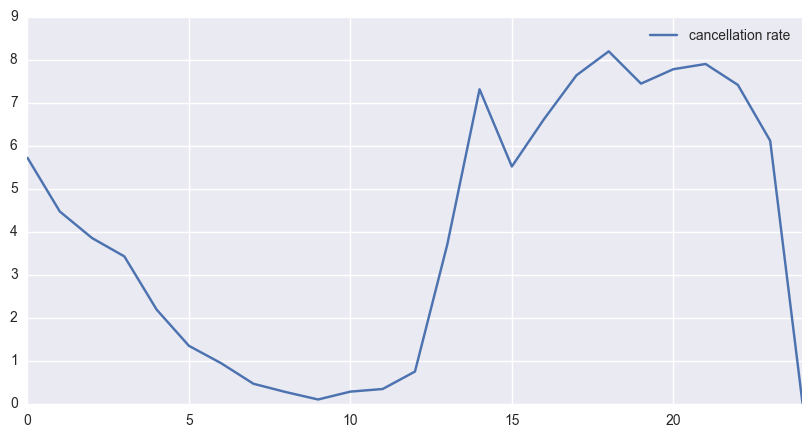

In [30]:
df.plot(figsize=(10,5));